In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
dataset = pd.read_csv(r'C:\Users\himan\OneDrive\Desktop\student_performance_predictor\dataset\student-mat.csv' ,sep=';')

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset[['absences']] = sc.fit_transform(dataset[['absences']])

In [4]:
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
from sklearn.preprocessing import LabelEncoder
for col in binary_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

In [5]:
dataset['G3_binary'] = (dataset['G3'] >= 10).astype(int)
dataset = dataset.drop(columns=['G1', 'G2'])

In [6]:
X = dataset[['reason','traveltime','studytime','failures','schoolsup','famsup','paid', 'activities',
             'nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc',
             'health','absences']]
y = dataset['G3_binary'].values


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['reason'])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("Original:", Counter(y_train))
print("Resampled:", Counter(y_resampled))

Original: Counter({np.int64(1): 212, np.int64(0): 104})
Resampled: Counter({np.int64(0): 212, np.int64(1): 212})


In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', C=100, gamma='scale', degree=2, probability=True)
classifier.fit(X_resampled, y_resampled)

SVC(C=100, degree=2, probability=True)

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.23      0.25        26
           1       0.65      0.70      0.67        53

    accuracy                           0.54        79
   macro avg       0.46      0.46      0.46        79
weighted avg       0.53      0.54      0.53        79



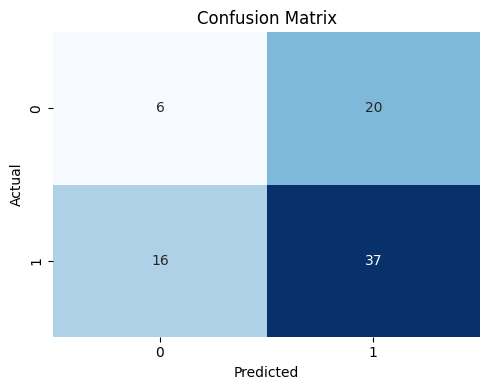

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

y_pred = classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix")
plt.tight_layout()
plt.show()